Question 1.
### Part (a): Problems Addressed by a Classification Decision Tree and Applications

**Classification Decision Tree**  
A classification decision tree is a supervised learning algorithm used to address *classification problems*, where the goal is to predict a discrete category or class label. These models work by dividing the feature space into regions based on decisions at branching points (nodes). Each branch corresponds to a condition on a feature, and the process continues until a terminal node (leaf) is reached, which contains the predicted class.

#### Examples of Real-World Applications:
1. **Medical Diagnosis**: Predicting whether a patient has a certain disease (e.g., cancer) based on medical features like age, test results, or symptoms.
2. **Email Filtering**: Classifying emails as "spam" or "not spam" based on keywords, frequency of certain phrases, or sender information.
3. **Credit Risk Assessment**: Determining if a loan applicant is "low-risk" or "high-risk" based on financial metrics like income, credit score, and debt.
4. **Customer Segmentation**: Classifying customers into groups (e.g., "loyal customers" or "at-risk customers") based on purchasing behavior or engagement.
5. **Animal Classification**: Identifying the species of an animal based on features such as size, color, or habitat.

**Classification vs. Regression**  
- **Classification** predicts discrete labels or categories (e.g., yes/no, spam/not spam).
- **Regression** predicts continuous numerical values (e.g., house prices, temperature, or stock prices).

### Part (b): Classification Decision Tree Predictions vs. Multiple Linear Regression Predictions  

#### How a Classification Decision Tree Makes Predictions:
1. **Sequential Decisions**:  
   - The tree starts at the root node.
   - At each node, a condition on one of the features is checked (e.g., "Is age > 30?").
   - Based on the outcome (true or false), the decision "branches" to a child node.

2. **Splitting Criteria**:  
   - The tree splits the dataset at each node to maximize "purity" in the resulting branches. Measures like *Gini Impurity* or *Entropy* are used to decide splits.

3. **Reaching a Leaf Node**:  
   - The process continues until a leaf node is reached. 
   - The leaf node contains the predicted class, which is often the majority class of the training samples that fall into that node.

**Example**:  
To classify whether an email is spam:  
- Root node checks: "Does the email contain the word 'lottery'?"  
- If yes, go to the left; if no, go to the right.  
- Further conditions are checked down the tree until reaching a terminal node, which assigns a prediction of "spam" or "not spam."

#### How Multiple Linear Regression Makes Predictions:
1. **Linear Form**:  
   - It predicts a numerical value by fitting a linear equation of the form:  
     $
     \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
     $
     where $ \beta_0, \beta_1, \dots, \beta_n $ are coefficients and $ x_1, x_2, \dots, x_n $ are input features.

2. **Prediction**:  
   - The prediction is a weighted sum of the features, adjusted by the coefficients learned during training.

**Key Difference**:  
- **Decision Tree**: Makes sequential decisions at each node to classify the input into a discrete category. The process is hierarchical and non-linear.  
- **Linear Regression**: Computes a weighted sum of features to predict a continuous output, assuming a linear relationship between features and the target.  

### Question 2.

__1. Accuracy__

Accuracy is useful for weather prediction as it measures proportion of correctly classified cases. For example, if we are predicting whether it will rain or not tomorrow, the cost of misclassification is not extremely high and we want a overview of the correct prediction rate of our model. For instance, predicting "rain" might not have severe consequences even the prediction is wrong, making overall accuracy a good fit. Then, accuracy is a good metric to observe the overall performance of our model. 


__2. Sensitivity__

Sensitivity measures the proportion of actual positive that are predicted, and is important for medical diagnostics, such as screening for a severe disease. In healthcare, missing a positive case can have severe consequences and is reflected by a low sensitivity (High false negatives). For example, a patient with cancer that is not diagnosed and may not receive the treatment. A higher sensitivity ensures that as many actual cases of the disease as possible are identified.


__3. Specificity__

Specificity measures the proportion of actual negatives that are correctly identified. A real life usage is spam email filtering, since we want to avoid false positives (non-spam emails marked as spam), so users don’t miss actual important messages. Specificity tells us the rate of legitimate emails (true negatives) being correctly identified and not flagged as spam.

__4. Precision__

Precision measures the proportion of positive predictions that are actually correct. This metric is used in scenarios like fraud detection to identifying fraudulent transactions. In this case, false positives are legitimate transactions flagged as fraud, and such mistakes will be disruptive for customers. We want to acheive a high precision to show that flagged transactions are very likely to be fraudulent, minimizing unnecessary flags and inconvenience.


Question 3.

In [34]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove specified columns
columns_to_drop = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_drop)

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert column data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Confirm the transformations
print(ab_reduced_noNaN.info())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


/tmp/ipykernel_54/612388655.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_54/612388655.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_54/612388655.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [35]:
# Display the first few rows of the cleaned dataset
print(ab_reduced_noNaN.head())

# Summarize numerical columns
print(ab_reduced_noNaN.describe())

# Summarize categorical columns
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

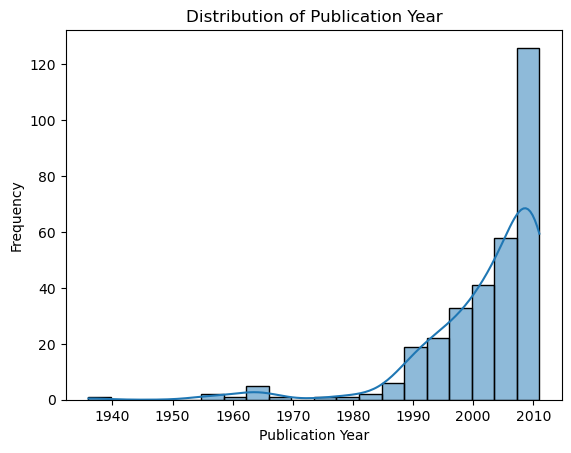

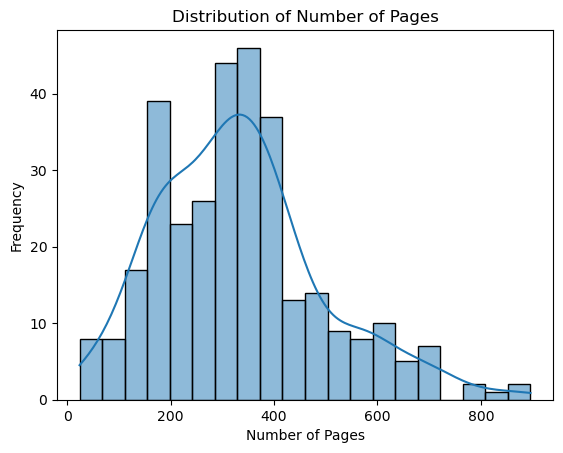

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Publication Year
sns.histplot(ab_reduced_noNaN['Pub year'], kde=True, bins=20)
plt.title('Distribution of Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of Number of Pages
sns.histplot(ab_reduced_noNaN['NumPages'], kde=True, bins=20)
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()


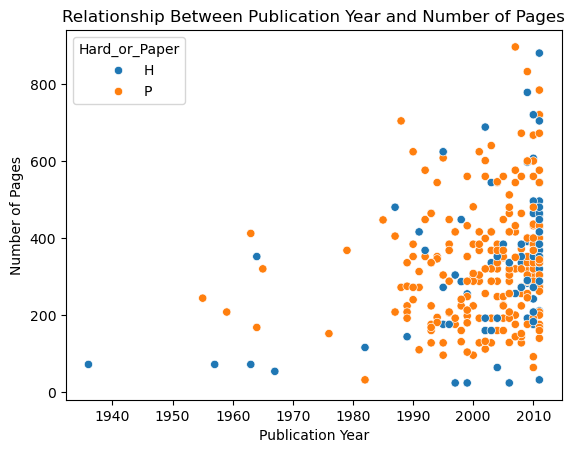

In [37]:
# Relationship between NumPages and Pub year
sns.scatterplot(data=ab_reduced_noNaN, x='Pub year', y='NumPages', hue='Hard_or_Paper')
plt.title('Relationship Between Publication Year and Number of Pages')
plt.xlabel('Publication Year')
plt.ylabel('Number of Pages')
plt.show()


In [38]:
# Analyze the proportion of "Hard_or_Paper"
hard_paper_counts = ab_reduced_noNaN['Hard_or_Paper'].value_counts(normalize=True) * 100
print("Percentage distribution of Hard_or_Paper:")
print(hard_paper_counts)


Percentage distribution of Hard_or_Paper:
Hard_or_Paper
P    73.040752
H    26.959248
Name: proportion, dtype: float64


### Question 4.

In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")


Training set size: 255 observations
Testing set size: 64 observations


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

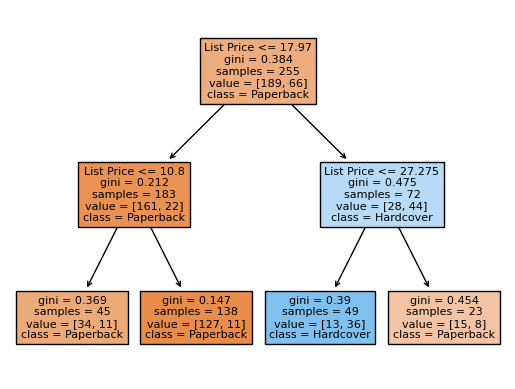

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the feature and target variable for the training set
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


1. **`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`**:

This line of code takes the `Hard_or_Paper` column from the dataset `ab_reduced_noNaN` and converts it into a binary variable through `pd.get_dummies()`. Rows containing 'H' represents the book is Hardcover, and will become values of 1. 0 represents all otherwise, and thus indicates the book is Paperback.
  
2. **`X = ab_reduced_noNaN[['List Price']]`**:

This line selects the `List Price` column from the dataset `ab_reduced_noNaN` and assigns it to `X`, which is the predictor for the decision tree. The list prices will be used to predict whether a book is a Hardcover or Paperback.

3. **`tree.plot_tree(clf)`**

The visualization created by tree.plot_tree(clf) displays the splits of the decision tree visually, where at each node, a thresholds for List Price decides how samples are splited between Hardcover and Paperback.

Question 5.

[Text(0.4342105263157895, 0.9, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.21052631578947367, 0.7, 'NumPages <= 82.0\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.10526315789473684, 0.5, 'Thick <= 0.25\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = Hardcover'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Hardcover'),
 Text(0.3157894736842105, 0.5, 'Thick <= 1.65\ngini = 0.175\nsamples = 176\nvalue = [159, 17]\nclass = Paperback'),
 Text(0.2631578947368421, 0.3, 'Thick <= 0.55\ngini = 0.166\nsamples = 175\nvalue = [159, 16]\nclass = Paperback'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = Paperback'),
 Text(0.3157894736842105, 0.1, 'gini = 0.199\nsamples = 143\nvalue = [127, 16]\nclass = Paperback'),
 Text(0.3684210526315789, 

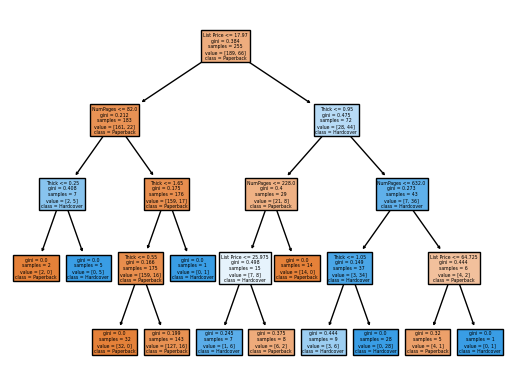

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the feature and target variable for the training set
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize and train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the tree using tree.plot_tree
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)


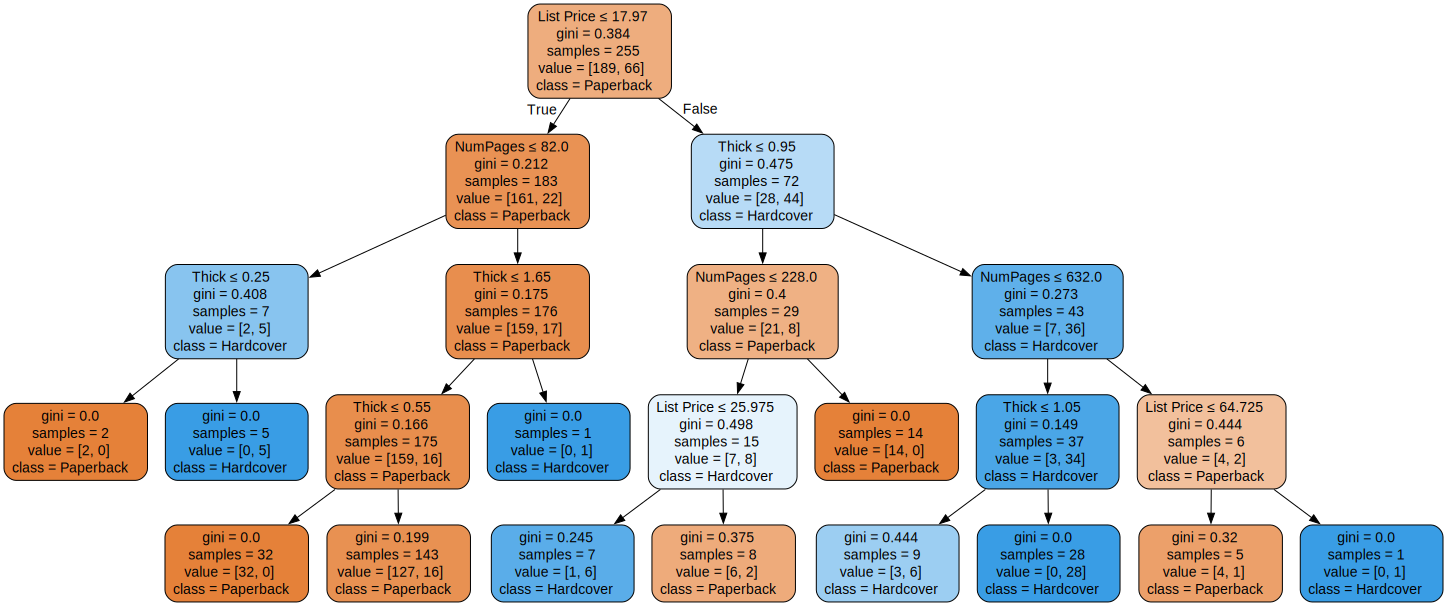

In [42]:
import graphviz
from sklearn.tree import export_graphviz

# Export the decision tree to Graphviz format
dot_data = export_graphviz(clf2, out_file=None, 
                           feature_names=['NumPages', 'Thick', 'List Price'],  
                           class_names=['Paperback', 'Hardcover'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Use graphviz to visualize
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Saves the visualization as 'decision_tree.pdf'
graph


How Predictions Are Made for clf2 Model:

Multiple Features: In this model, the decision-making process considers three features:

NumPages: Number of pages in the book. Thick: The thickness of the book. List Price: The price of the book.

Decision Nodes: Each internal node in the decision tree represents a decision based on one of these features. For example:
A decision node might test whether List Price ≤ 30. Another might check if NumPages > 250.

Sequential Decisions: The model goes through multiple levels (up to 4, as specified by max_depth=4) of decisions to classify the book. Each branch represents a "yes" or "no" decision: If a condition is met, the observation follows one branch; otherwise, it goes down the other.

Leaf Nodes: At the terminal nodes (leaves), the decision is made based on the majority class of training data that ended up in that node: If more "Hardcover" books reach a leaf, it predicts "Hardcover". If more "Paperback" books reach a leaf, it predicts "Paperback".

Example of Prediction Flow:
The model might start by evaluating NumPages. If NumPages ≤ 200, it could then evaluate List Price. If List Price > $25, it might then check Thick. If Thick > 1.5 inches, it might decide the book is a "Hardcover"; otherwise, it could be a "Paperback".

### Question 6.

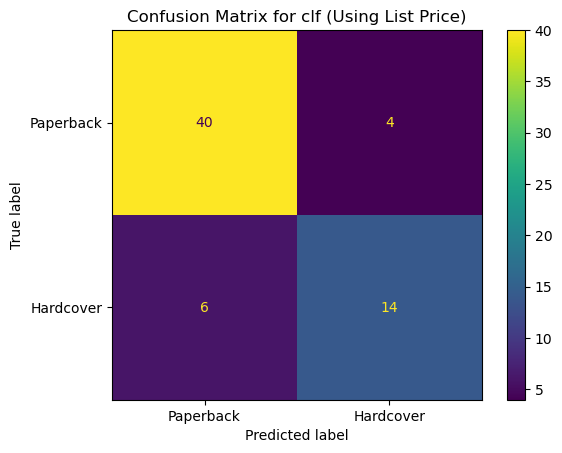

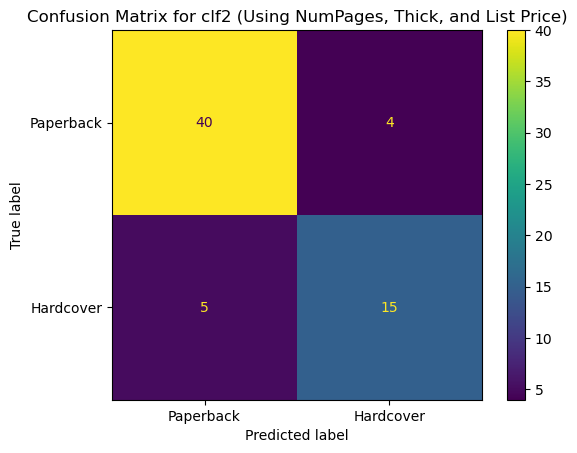

Metrics for clf:
Accuracy (clf): 0.844, Sensitivity (clf): 0.7, Specificity (clf): 0.909

Metrics for clf2:
Accuracy (clf2): 0.859, Sensitivity (clf2): 0.75, Specificity (clf2): 0.909


In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predictions for clf and clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Create confusion matrices for clf and clf2
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1])
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1])

# Confusion Matrix Display for clf
cm_disp_clf = ConfusionMatrixDisplay(
    conf_matrix_clf, 
    display_labels=['Paperback', 'Hardcover']
)
_ = cm_disp_clf.plot()
plt.title("Confusion Matrix for clf (Using List Price)")
plt.show()

# Confusion Matrix Display for clf2
cm_disp_clf2 = ConfusionMatrixDisplay(
    conf_matrix_clf2, 
    display_labels=['Paperback', 'Hardcover']
)
_ = cm_disp_clf2.plot()
plt.title("Confusion Matrix for clf2 (Using NumPages, Thick, and List Price)")
plt.show()

# Function to calculate metrics: accuracy, sensitivity, specificity
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    
    # Calculating metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    # Round metrics to three significant digits
    accuracy = np.round(accuracy, 3)
    sensitivity = np.round(sensitivity, 3)
    specificity = np.round(specificity, 3)
    
    return accuracy, sensitivity, specificity

# Calculate metrics for clf and clf2
accuracy_clf, sensitivity_clf, specificity_clf = calculate_metrics(conf_matrix_clf)
accuracy_clf2, sensitivity_clf2, specificity_clf2 = calculate_metrics(conf_matrix_clf2)

# Display results
print("Metrics for clf:")
print(f"Accuracy (clf): {accuracy_clf}, Sensitivity (clf): {sensitivity_clf}, Specificity (clf): {specificity_clf}\n")

print("Metrics for clf2:")
print(f"Accuracy (clf2): {accuracy_clf2}, Sensitivity (clf2): {sensitivity_clf2}, Specificity (clf2): {specificity_clf2}")


### Question 7.

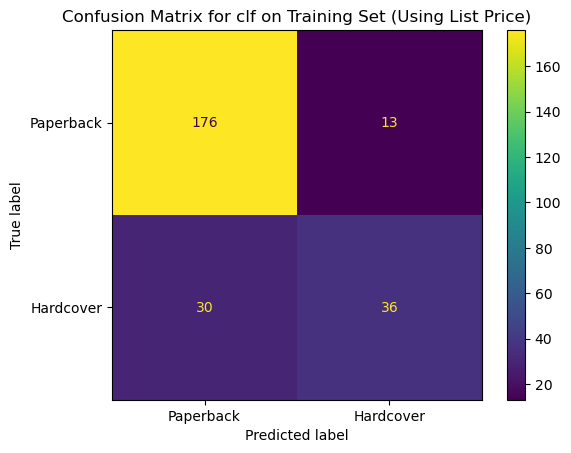

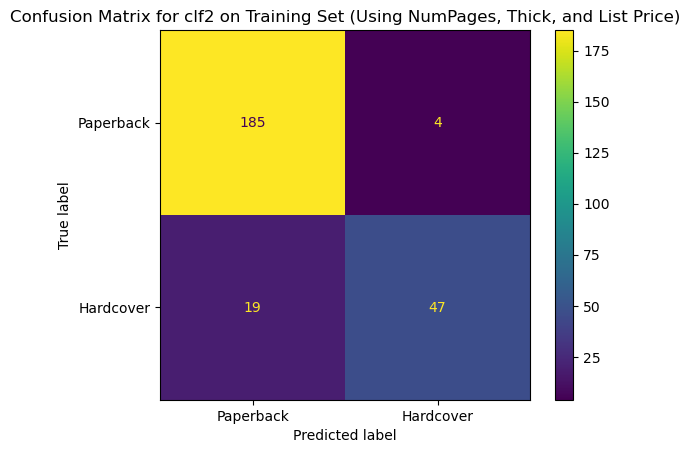

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume the target variable should be 'Hard_or_Paper' encoded as before
# Using the training set to demonstrate the mistake from earlier:
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train_clf = ab_reduced_noNaN_train[['List Price']]
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Predictions for clf and clf2 on training data
y_pred_clf_train = clf.predict(X_train_clf)
y_pred_clf2_train = clf2.predict(X_train_clf2)

# Correct Confusion Matrix for clf on the training set
cm_disp_clf_train = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_clf_train, labels=[0, 1]), 
    display_labels=['Paperback', 'Hardcover']
)
_ = cm_disp_clf_train.plot()
plt.title("Confusion Matrix for clf on Training Set (Using List Price)")
plt.show()

# Correct Confusion Matrix for clf2 on the training set
cm_disp_clf2_train = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_clf2_train, labels=[0, 1]), 
    display_labels=['Paperback', 'Hardcover']
)
_ = cm_disp_clf2_train.plot()
plt.title("Confusion Matrix for clf2 on Training Set (Using NumPages, Thick, and List Price)")
plt.show()


The differences between the new two confusion matrices come from the predictors used to train the model. The first confusion matrix only uses List Price to predict whether a book is a Hardcover or Paperback. Meanwhile, the second confusion matrix is based on  multiple predictors, NumPages, Thick, and List Price. 

The previous confusion matrices for clf and clf2 are better because they are trained and tested with a splited data, while the new provided matrices and tested with the the same dataset as their training data. Training and testing with different data avoids overfitting and provides a more realistic measure of how well the models generalize to unseen data.

Question 8.

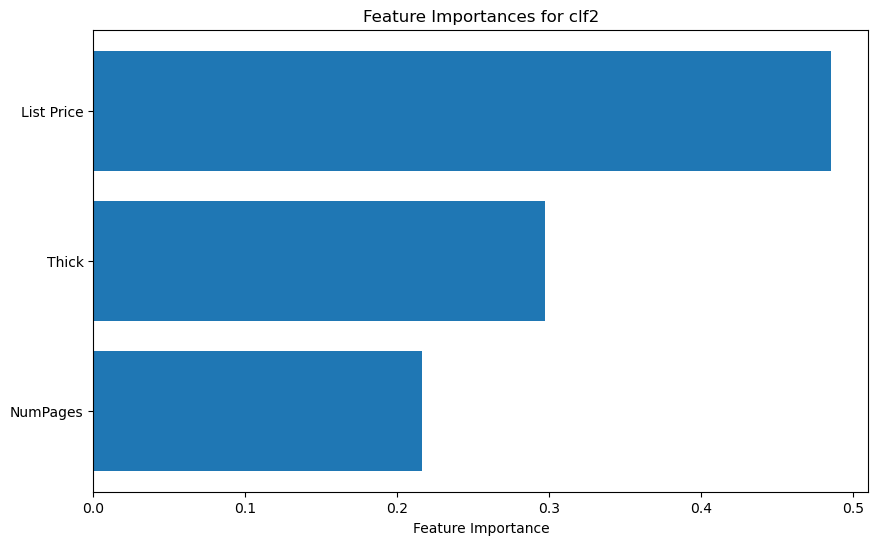

The most important feature is: List Price


In [47]:
import matplotlib.pyplot as plt

# Assuming clf2 is your trained DecisionTreeClassifier
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.show()

# To report the most important feature
most_important_feature = feature_names[importances.argmax()]
print(f"The most important feature is: {most_important_feature}")

To visualize feature importances for a classification decision tree in scikit-learn, you can use `.feature_importances_`, which provides the relative importance of each feature used in the model. To display this information visually, you can use a bar plot or a similar visualization.

Here’s how you can visualize the feature importances for `clf2` and identify the most important predictor variable:

1. **Get the feature importances and corresponding feature names**:
   Use `clf2.feature_importances_` for the importances and `clf2.feature_names_in_` for the names of the features.

2. **Plotting the feature importances**:
   You can use `matplotlib` to create a bar plot showing the feature importances.

Here’s some code for visualizing feature importances:

### Explanation:
- `clf2.feature_importances_` gives an array with the importance of each feature.
- `clf2.feature_names_in_` provides the names of the features used in the model.
- `plt.barh()` creates a horizontal bar plot to show the relative importance of each feature.
- The feature with the highest importance can be found using `importances.argmax()`.

This visualization helps in understanding which predictor variable is contributing the most to the model’s predictions.

Question 9.

In linear regression, the coefficients represent the direct effect of each predictor variable on the dependent variable, where each coefficient reflects how much the dependent variable is expected to change with a one-unit increase in the corresponding predictor, assuming all other predictors remain constant. In contrast, feature importances in decision trees do not provide a direct quantitative effect but rather indicate the relative contribution of each feature in improving the model's predictive accuracy at each decision node. Decision trees are more focused on how features contribute to splitting the data into distinct outcomes, rather than showing a linear relationship with the target variable.

CHATGPT Session 1

Link:https://chatgpt.com/share/673fe1ea-3920-800f-af54-44350ba89ac2
    
Summary: Here’s a summary of our recent exchanges for your homework assignment:

1. **Data Splitting and Model Training:**
   We discussed splitting your dataset into training and testing sets for classification models. You used `train_test_split()` and `df.sample()` to achieve an 80/20 split for training (`ab_reduced_noNaN_train`) and testing (`ab_reduced_noNaN_test`) sets. This process was done with a focus on creating reproducible splits by setting a random seed.

2. **Decision Tree Model Fitting:**
   We explored fitting a `DecisionTreeClassifier` using a single predictor variable (`List Price`) and then used it for predicting whether books are hardcover or paperback. We also examined how the model's performance could be assessed with confusion matrices and metrics like accuracy, sensitivity, and specificity.

3. **Visualizing the Decision Tree:**
   We learned how to visualize the decision tree with `tree.plot_tree(clf)` to understand how predictions are made based on the chosen features. Additionally, you were shown how to assess feature importance in the decision tree model using `.feature_importances_` to determine which features contribute the most to predictions.

4. **Comparing Models:**
   We compared models trained with different sets of features (e.g., `List Price` vs. `NumPages, Thick, List Price`) and evaluated their performance using confusion matrices. We discussed the differences between using simpler models with fewer features versus more complex ones and how the metrics (accuracy, sensitivity, and specificity) help assess model performance.

5. **Feature Importance vs. Coefficients in Linear Models:**
   The difference between interpreting coefficients in linear regression models and feature importances in decision trees was clarified. In linear regression, coefficients represent the change in the outcome variable for each predictor, while feature importances in decision trees show the relative contribution of each feature to the model’s predictive accuracy.

These points outline our discussions and can be used as a comprehensive record for your assignment. Let me know if you need any further clarification or additional information.

Question 10. Have you reviewed...?

YES I HAVE REVIEWED A LOT, BUT FOR OTHER EXAMS T_T